Import libraries

In [78]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [79]:
data_set = pd.read_csv('data.csv')

In [80]:
data_set.describe()

,age,perfEval,seniority,basePay,bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


In [81]:
def plot_scatter(x,y,xp,yp,title=""):
    """Plots the original data (x,y) and a set of point (xp,yp) showing the model approximation"""
    font = {'family' : 'sans',
        'size'   : 14}
    plt.rc('font', **font)

    plt.scatter(x, y,  color='blue')
    plt.plot(xp, yp, color='red', linewidth=3)
    plt.xlabel("basePay")
    plt.ylabel("seniority")
    
    if (title!=""):
        plt.title(title)

    plt.xlim([35000,180000])
    plt.ylim([0,6])
    plt.show()

In [82]:
X = data_set['basePay'].values.reshape(-1,1)
y = data_set['seniority']

In [83]:
linear_regressor = linear_model.LinearRegression()
X.reshape(-1,1)
linear_regressor.fit(X, y);

In [84]:
yp = linear_regressor.predict(X)

r2 = r2_score(y,yp)

rss = sum((yp-y)*(yp-y))

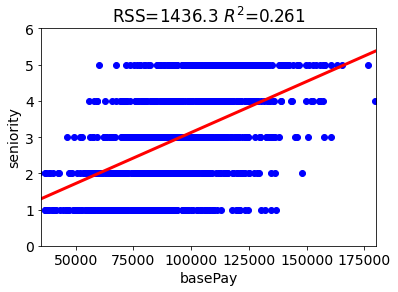

In [85]:
title = "RSS=%.1f $R^2$=%.3f"%(rss,r2)
Xplot = np.arange(np.min(X),np.max(X),0.1).reshape(-1,1)
yplot = linear_regressor.predict(Xplot)
plot_scatter(X,y,Xplot,yplot,title)

In [86]:
residuals = y-yp

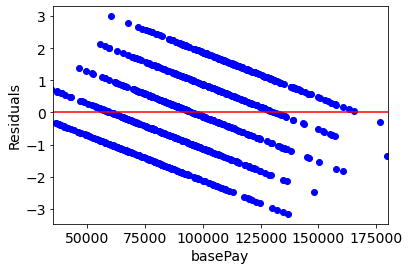

In [87]:
font = {'family' : 'sans', 'size'   : 14}
plt.rc('font', **font)
plt.scatter(X, residuals,  color='blue')
plt.plot([35000,180000],[0,0],'-',c="red")
plt.xlabel("basePay")
plt.ylabel("Residuals")
plt.xlim([35000,180000])
plt.show()

In [88]:
from sklearn.preprocessing import StandardScaler
normalized_residuals = StandardScaler().fit_transform(residuals.values.reshape(-1,1))

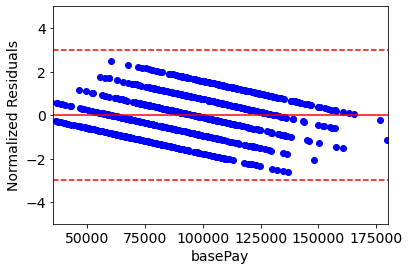

In [89]:
font = {'family' : 'sans', 'size'   : 14}
plt.rc('font', **font)
plt.scatter(X, normalized_residuals,  color='blue')
plt.plot([35000,180000],[0,0],'-',c="red")
plt.plot([35000,180000],[-3,-3],'--',c="red")
plt.plot([35000,180000],[3,3],'--',c="red")
plt.xlabel("basePay")
plt.ylabel("Normalized Residuals")
plt.xlim([35000,180000])
plt.ylim([-5,5])
plt.show()

In [90]:
from sklearn.preprocessing import PolynomialFeatures

In [91]:
polynomial2 = PolynomialFeatures(degree=2, include_bias=False)
X2 = polynomial2.fit_transform(X)

In [92]:
linear_regressor2 = linear_model.LinearRegression()
X2.reshape(-1,2)
linear_regressor2.fit(X2, y);
yp2 = linear_regressor2.predict(X2)

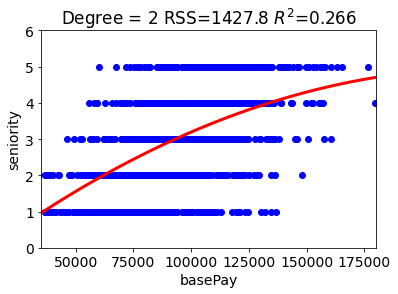

In [93]:
r2_p2 = r2_score(y,yp2)
rss_p2 = sum((yp2-y)*(yp2-y))

# let's create the input data to plot the model
Xplot = np.arange(np.min(X),np.max(X),0.1).reshape(-1,1)
Xplot2 = polynomial2.fit_transform(Xplot)

# compute the model on the plot data
yplot2 = linear_regressor2.predict(Xplot2)

plot_scatter(X[:,0],y,Xplot2[:,0],yplot2,"Degree = 2 RSS=%.1f $R^2$=%.3f"%(rss_p2,r2_p2))

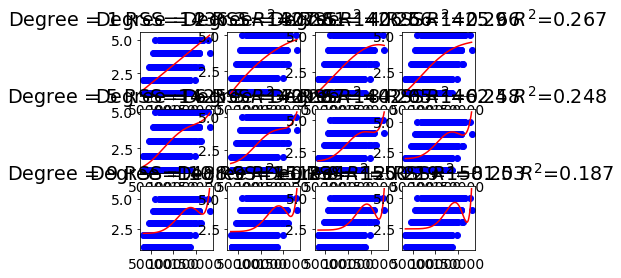

In [94]:
max_polynomial = 12
f, axarr = plt.subplots(3, 4)

plt.rcParams['figure.figsize'] = (50.0, 40.0)
font = {'family' : 'sans', 'size'   : 16}
plt.rc('font', **font)

for degree in range(1,max_polynomial+1):
    if (degree!=1):
        polynomial = PolynomialFeatures(degree=degree, include_bias=False)
        X_polynomial = polynomial.fit_transform(X)
        Xplot = np.arange(np.min(X),np.max(X),0.1).reshape(-1,1)
        Xplot_polynomial = polynomial.fit_transform(Xplot)
    else:
        Xplot = np.arange(np.min(X),np.max(X),0.1).reshape(-1,1)
        Xplot_polynomial = Xplot
        X_polynomial = X
    

    linear_regressor = linear_model.LinearRegression()
    X_polynomial.reshape(-1,degree)
    linear_regressor.fit(X_polynomial, y);

    yp = linear_regressor.predict(X_polynomial)
    yplot = linear_regressor.predict(Xplot_polynomial)

    r2 = r2_score(y,yp)
    rss = sum((yp-y)*(yp-y))

    title = "DEGREE "+str(degree)+" RSS=" + str(round(rss,3))+" R="+str(round(r2,3))
    
    target_plot = axarr[int((degree-1)/4),int((degree-1)%4)]
    target_plot.scatter(X[:,0],y, color="blue")
    target_plot.set_title("Degree = %d RSS=%.1f $R^2$=%.3f"%(degree,rss,r2))
    target_plot.plot(Xplot2[:,0],yplot, color="red")

In [95]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=1234)

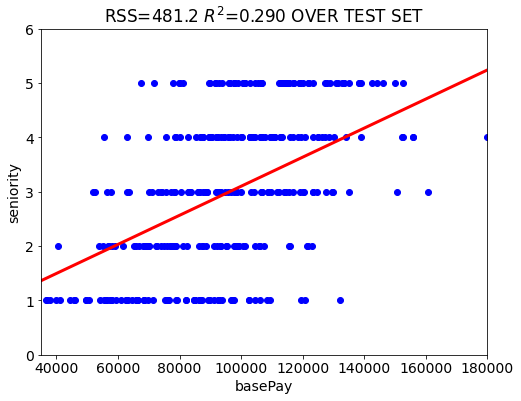

In [96]:
# build the model on the train
linear_regressor.fit(X_train, y_train);

# evaluate the model on the test
yp = linear_regressor.predict(X_test)

r2 = r2_score(y_test,yp)

rss = sum((yp-y_test)*(yp-y_test))

title = "RSS=%.1f $R^2$=%.3f OVER TEST SET"%(rss,r2)
Xplot = np.arange(np.min(X),np.max(X),0.1).reshape(-1,1)
yplot = linear_regressor.predict(Xplot)
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plot_scatter(X_test,y_test,Xplot,yplot,title)

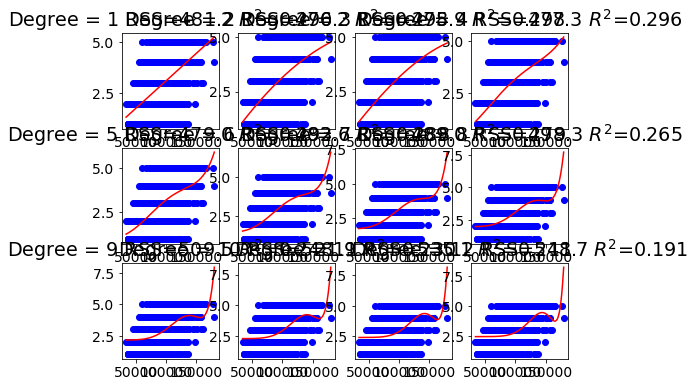

In [97]:
max_polynomial = 12
f, axarr = plt.subplots(3, 4)

plt.rcParams['figure.figsize'] = (50.0, 40.0)
font = {'family' : 'sans', 'size'   : 16}
plt.rc('font', **font)

rss_train_values = []
r2_train_values = []


rss_values = []
r2_values = []

for degree in range(1,max_polynomial+1):
    if (degree!=1):
        polynomial = PolynomialFeatures(degree=degree, include_bias=False)
        X_polynomial = polynomial.fit_transform(X)
        Xplot = np.arange(np.min(X),np.max(X),0.1).reshape(-1,1)
        Xplot_polynomial = polynomial.fit_transform(Xplot)
    else:
        Xplot = np.arange(np.min(X),np.max(X),0.1).reshape(-1,1)
        Xplot_polynomial = Xplot
        X_polynomial = X
    

    X_train, X_test, y_train, y_test = model_selection.train_test_split(X_polynomial, y, test_size=0.33, random_state=1234)
    
    linear_regressor = linear_model.LinearRegression()
    X_polynomial.reshape(-1,degree)
    linear_regressor.fit(X_train, y_train);

    yp_train = linear_regressor.predict(X_train)
    r2_train = r2_score(y_train,yp_train)
    rss_train = ((yp_train-y_train)**2).sum()
    rss_train_values.append(rss_train)
    r2_train_values.append(r2_train)

    yp = linear_regressor.predict(X_test)
    yplot = linear_regressor.predict(Xplot_polynomial)

    r2 = r2_score(y_test,yp)
    rss = ((yp-y_test)**2).sum()
    
    rss_values.append(rss)
    r2_values.append(r2)

    title = "DEGREE "+str(degree)+" RSS=" + str(round(rss,3))+" R="+str(round(r2,3))
    
    target_plot = axarr[int((degree-1)/4),int((degree-1)%4)]
    target_plot.scatter(X[:,0],y, color="blue")
    target_plot.set_title("Degree = %d RSS=%.1f $R^2$=%.3f"%(degree,rss,r2))
    target_plot.plot(Xplot2[:,0],yplot, color="red")

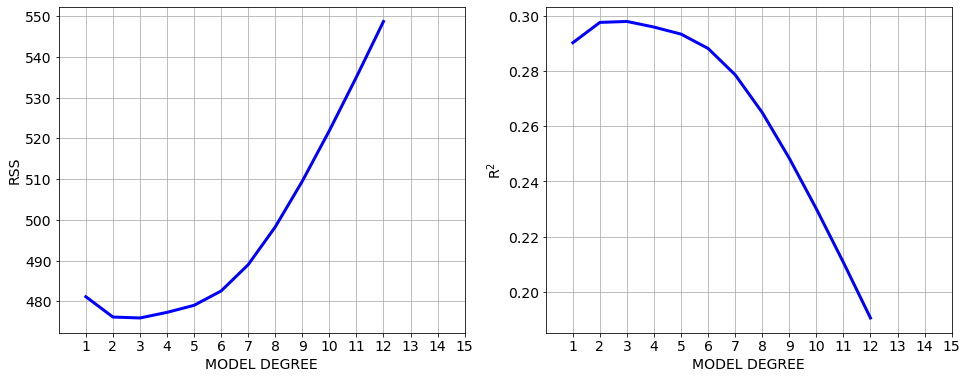

In [98]:
plt.rcParams['figure.figsize'] = (16.0, 6.0)
font = {'family' : 'sans', 'size':14}
plt.rc('font', **font)
f, axarr = plt.subplots(1, 2)

axarr[0].set_xlabel("MODEL DEGREE")
axarr[0].set_ylabel("RSS")
axarr[0].set_xlim([0,13])
axarr[0].set_xticks(range(1,16))
axarr[0].grid()
axarr[0].plot(range(1,max_polynomial+1), rss_values, color="blue",linewidth=3);

axarr[1].set_xlabel("MODEL DEGREE")
axarr[1].set_ylabel("R$^2$")
axarr[1].set_xlim([0,13])
axarr[1].set_xticks(range(1,16))
axarr[1].grid()
axarr[1].plot(range(1,max_polynomial+1), r2_values, color="blue",linewidth=3);

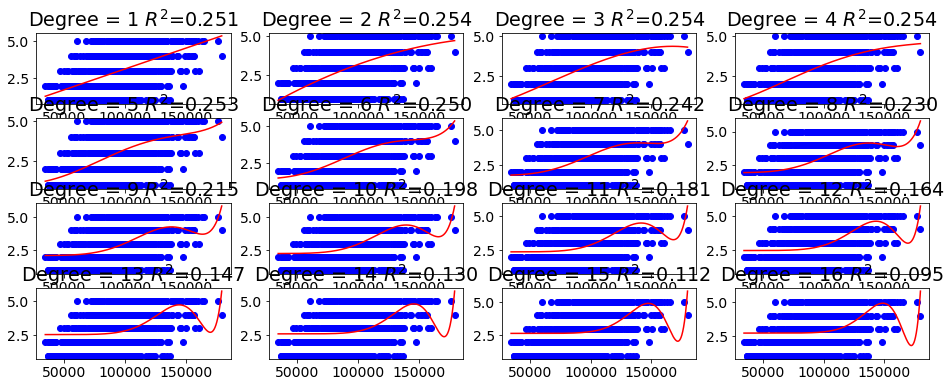

In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

max_polynomial = 16
f, axarr = plt.subplots(4, 4)

plt.rcParams['figure.figsize'] = (50.0, 50.0)
font = {'family' : 'sans', 'size'   : 16}
plt.rc('font', **font)

rss_values = []
r2_values = []

for degree in range(1,max_polynomial+1):
    if (degree!=1):
        polynomial = PolynomialFeatures(degree=degree, include_bias=False)
        X_polynomial = polynomial.fit_transform(X)
        Xplot = np.arange(np.min(X),np.max(X),0.1).reshape(-1,1)
        Xplot_polynomial = polynomial.fit_transform(Xplot)
    else:
        Xplot = np.arange(np.min(X),np.max(X),0.1).reshape(-1,1)
        Xplot_polynomial = Xplot
        X_polynomial = X
    

    linear_regressor = linear_model.LinearRegression()

    X_polynomial.reshape(-1,degree)

    # score returns the scores for each single run
    score = cross_val_score(linear_regressor, X_polynomial, y, cv=KFold(n_splits=10, shuffle=True, random_state=1234))

    r2 = score.mean()    
    r2_values.append(r2)
    
    # let's build the final model (using **all the data**)
    linear_regressor.fit(X_polynomial,y)
    yplot = linear_regressor.predict(Xplot_polynomial)

    title = "DEGREE "+str(degree)+" RSS=" + str(round(rss,3))+" R="+str(round(r2,3))
    
    target_plot = axarr[int((degree-1)/4),int((degree-1)%4)]
    target_plot.scatter(X[:,0],y, color="blue")
    target_plot.set_title("Degree = %d $R^2$=%.3f"%(degree,r2))
    target_plot.plot(Xplot2[:,0],yplot, color="red")
    

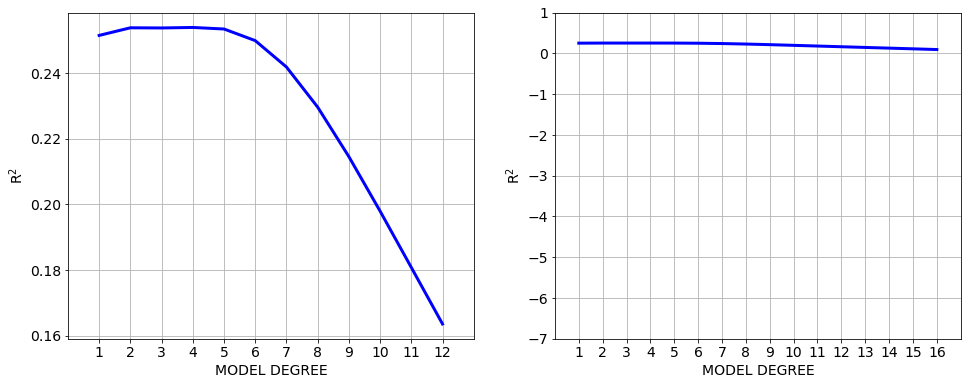

In [100]:
plt.rcParams['figure.figsize'] = (16.0, 6.0)
font = {'family' : 'sans', 'size':14}
plt.rc('font', **font)
f, axarr = plt.subplots(1, 2)

axarr[0].set_xlabel("MODEL DEGREE")
axarr[0].set_ylabel("R$^2$")
axarr[0].set_xlim([0,13])
axarr[1].set_ylim([0,1])
axarr[0].set_xticks(range(1,13))
axarr[0].grid()
axarr[0].plot(range(1,13), r2_values[0:12], color="blue",linewidth=3);

axarr[1].set_xlabel("MODEL DEGREE")
axarr[1].set_ylabel("R$^2$")
axarr[1].set_xlim([0,17])
axarr[1].set_xticks(range(1,17))
axarr[1].set_ylim([-7,1])
axarr[1].grid()
axarr[1].plot(range(1,max_polynomial+1), r2_values, color="blue",linewidth=3);

In [101]:
polynomial = PolynomialFeatures(degree=10, include_bias=False)
X_polynomial = polynomial.fit_transform(X)

scaler = StandardScaler()

scaler.fit(X_polynomial)

X_normalized = scaler.transform(X_polynomial)

Xplot = np.arange(np.min(X),np.max(X),0.1).reshape(-1,1)
Xplot_polynomial = polynomial.fit_transform(Xplot)

Xplot_normalized = scaler.transform(Xplot_polynomial)


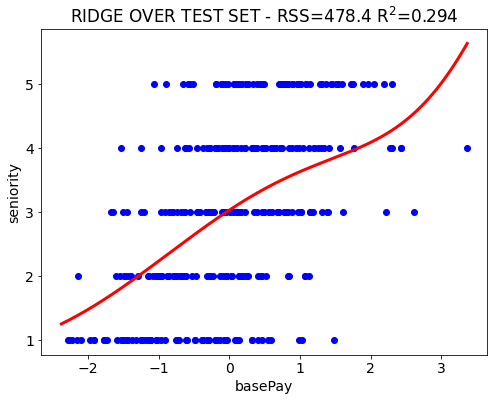

In [102]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1,max_iter=1000,random_state=1234)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_normalized, y, test_size=0.33, random_state=1234)

ridge_model = ridge.fit(X_train,y_train)

yp = ridge.predict(X_test)
yp_plot = ridge.predict(Xplot_normalized)

r2 = r2_score(y_test,yp)
rss = ((yp-y_test)**2).sum()

plt.rcParams['figure.figsize'] = (8.0, 6.0)
font = {'family' : 'sans', 'size'   : 14}
plt.rc('font', **font)

plt.scatter(X_test[:,0], y_test,  color='blue')
plt.plot(Xplot_normalized[:,0], yp_plot, color='red', linewidth=3)
plt.xlabel("basePay")
plt.ylabel("seniority")
plt.title("RIDGE OVER TEST SET - RSS=%.1f R$^2$=%.3f"%(rss,r2))
plt.show()

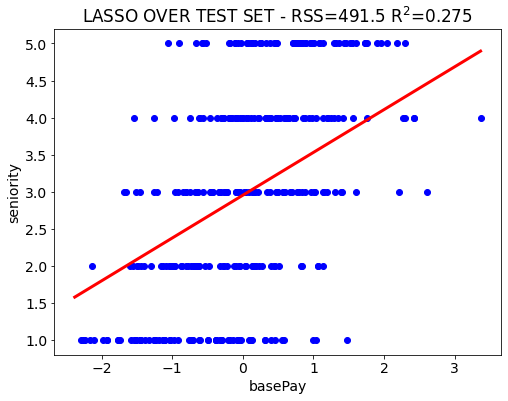

In [103]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1,max_iter=1000,random_state=1234)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_normalized, y, test_size=0.33, random_state=1234)

lasso_model = lasso.fit(X_train,y_train)

yp = lasso.predict(X_test)
yp_plot = lasso.predict(Xplot_normalized)

r2 = r2_score(y_test,yp)
rss = ((yp-y_test)**2).sum()

plt.rcParams['figure.figsize'] = (8.0, 6.0)
font = {'family' : 'sans', 'size'   : 14}
plt.rc('font', **font)

plt.scatter(X_test[:,0], y_test,  color='blue')
plt.plot(Xplot_normalized[:,0], yp_plot, color='red', linewidth=3)
plt.xlabel("basePay")
plt.ylabel("seniority")
plt.title("LASSO OVER TEST SET - RSS=%.1f R$^2$=%.3f"%(rss,r2))
plt.show()

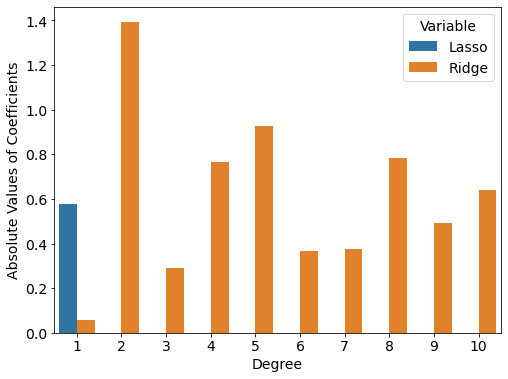

In [104]:
import seaborn
coefficients = pd.DataFrame({'Degree':[x for x in range(1,len(lasso_model.coef_)+1)], 'Lasso':np.abs(lasso_model.coef_), 'Ridge':np.abs(ridge_model.coef_)})
tidy = coefficients.melt(id_vars='Degree').rename(columns=str.title)
seaborn.barplot(x='Degree', y='Value', hue='Variable', data=tidy)
plt.ylabel("Absolute Values of Coefficients");

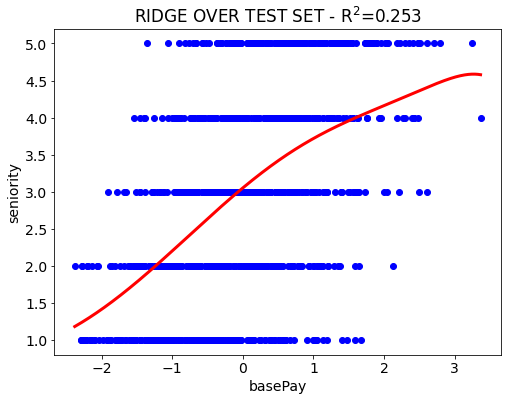

In [105]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1,max_iter=1000,random_state=1234)

score = cross_val_score(ridge, X_normalized, y, cv=KFold(n_splits=10, shuffle=True, random_state=1234))

r2 = score.mean()

yp = ridge.fit(X_normalized,y)
yp_plot = ridge.predict(Xplot_normalized)

plt.rcParams['figure.figsize'] = (8.0, 6.0)
font = {'family' : 'sans', 'size'   : 14}
plt.rc('font', **font)

plt.scatter(X_normalized[:,0], y,  color='blue')
plt.plot(Xplot_normalized[:,0], yp_plot, color='red', linewidth=3)
plt.xlabel("basePay")
plt.ylabel("seniority")
plt.title("RIDGE OVER TEST SET - R$^2$=%.3f"%(r2))
plt.show()

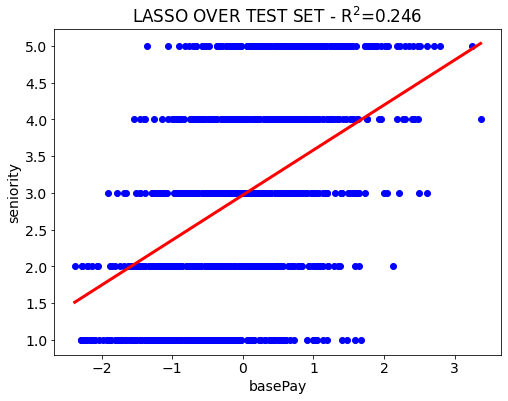

In [106]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1,max_iter=1000,random_state=1234)

score = cross_val_score(lasso, X_normalized, y, cv=KFold(n_splits=10, shuffle=True, random_state=1234))

r2 = score.mean()

yp = lasso.fit(X_normalized,y)
yp_plot = lasso.predict(Xplot_normalized)

plt.rcParams['figure.figsize'] = (8.0, 6.0)
font = {'family' : 'sans', 'size'   : 14}
plt.rc('font', **font)

plt.scatter(X_normalized[:,0], y,  color='blue')
plt.plot(Xplot_normalized[:,0], yp_plot, color='red', linewidth=3)
plt.xlabel("basePay")
plt.ylabel("seniority")
plt.title("LASSO OVER TEST SET - R$^2$=%.3f"%(r2))
plt.show()